In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.shape

(103904, 25)

Train Dataset consists of **103904 ROWS & 25 COLUMNS**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


* 50% of passengers are under 40
* Average distance travelled 843.0 km
* Seat comfort, Inflight Entertainment, On-board service, Leg room service, Baggage handling, Inflight Service MOST are satisfied
* Baggage Handling has no zero ratings
* Minimum delay <=12 mins for Departure
* Minimum delay <=13 mins for Arrival


In [6]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
df.describe(include = ['object']).T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


**HIGHEST COUNTS of CATEGORICAL VALUES IN ROWS**

Gender: Female - 52,727

Customer Type: Loyal Customer - 84,923

Type of Travel: Business travel - 71,655

Class: Business - 49,665

satisfaction: neutral or dissatisfied - 58,879  // Satisfied = 45,025

# **UNIVARIATE ANALYSIS**

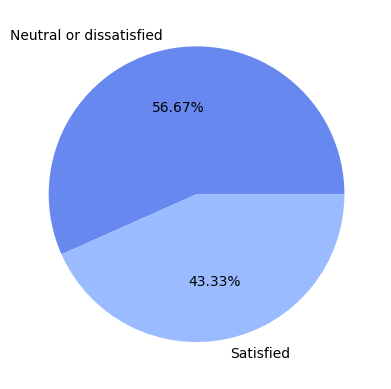

In [9]:
plt.pie(df.satisfaction.value_counts(), labels = ['Neutral or dissatisfied', 'Satisfied'], colors = sns.color_palette('coolwarm'), autopct = '%1.2f%%')
pass

* Nearly 56.67 % are Dissatisfied or Neutral
* Only   43.33 % are Satisfied


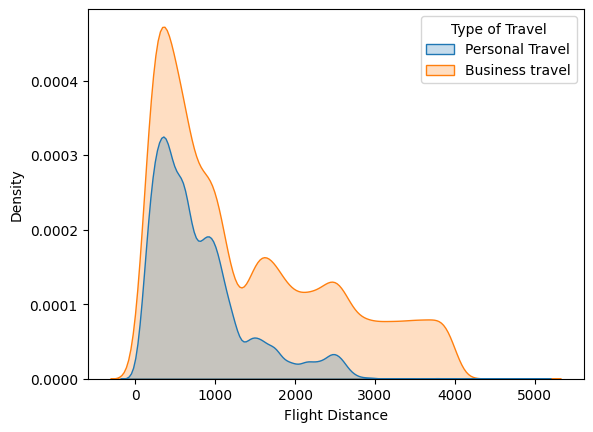

In [10]:
sns.kdeplot(data = df, x = 'Flight Distance', fill = True, hue = 'Type of Travel')
plt.show()

* IF THE DISTANCE OF FLIGHT < 3000 PEOPLE PREFER PERSONAL TRAVEL
* BY INFERRING THE PDF, THE HIGHEST PROBABILITY OF KDE GRAPH LIES BETWEEN 500 - 1000 KM
* IF THE DISTANCE OF FLIGHT SLIGHTLY ABOVE 4000 PEOPLE PREFER BUSINESS TRAVEL

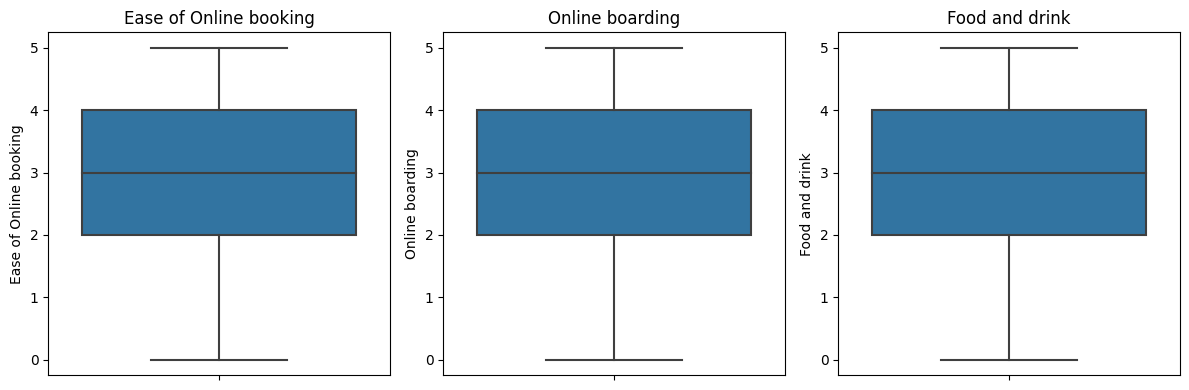

In [11]:
variables = ['Ease of Online booking', 'Online boarding', 'Food and drink']

fig, axes = plt.subplots(nrows = 1, ncols = len(variables), figsize = (12, 4))

# TO ITERATE THE VARIABLES
for i, var in enumerate(variables):
    sns.boxplot(data = df, y = var, ax = axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

THE RATINGS OF
1. EASE OF ONLINE BOOKING
2. ONLINE BOARDING
3. FOOD AND DRINK
**2 TO 4**

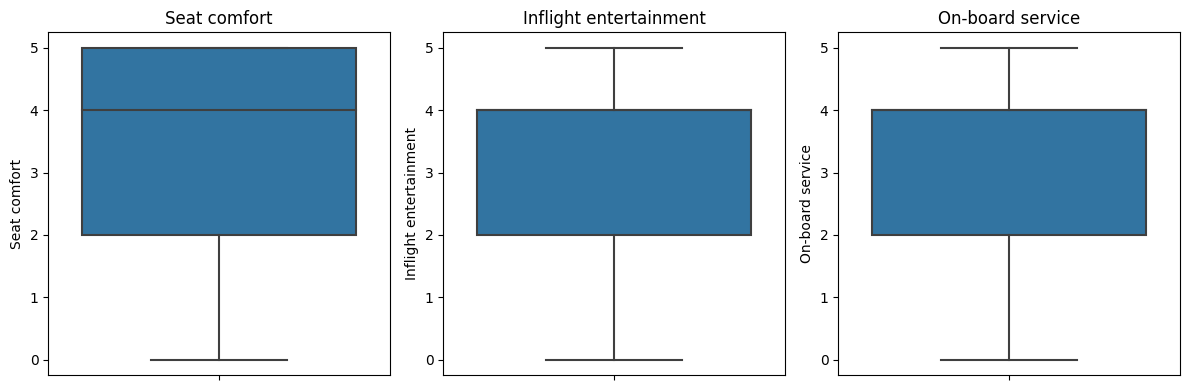

In [12]:
variables_2 = ['Seat comfort', 'Inflight entertainment', 'On-board service']

fig, axes = plt.subplots(nrows = 1, ncols = len(variables), figsize = (12, 4))

for i, var in enumerate(variables_2):
    sns.boxplot(data = df, y = var, ax = axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

* **SEAT COMFORT - 2 TO 5, Q2 => 2 TO 4, Q3 - 4, Q4 -> 5, NO OUTLIERS**
* **INFLIGHT ENTERTAINMENT & ON-BORAD SERVICE - 2 TO 4**

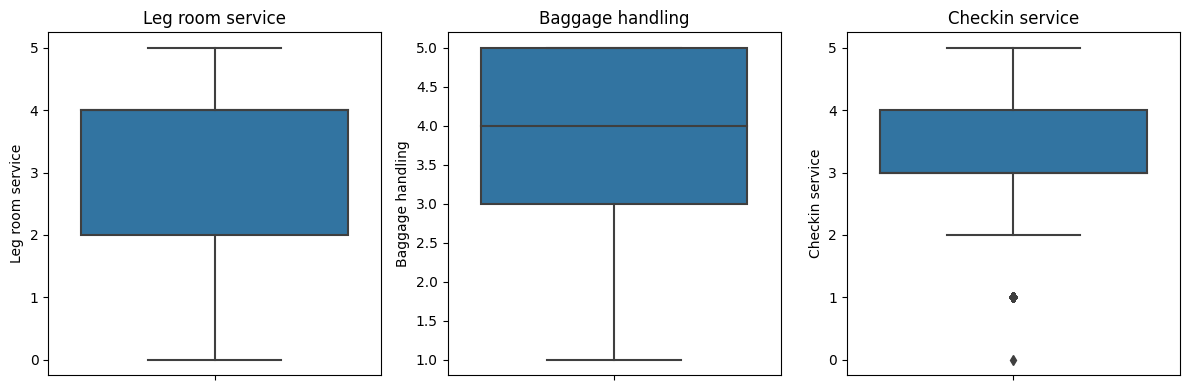

In [13]:
variables_3 = ['Leg room service', 'Baggage handling', 'Checkin service']

fig, axes = plt.subplots(nrows = 1, ncols = len(variables_3), figsize = (12, 4))

for i, var in enumerate(variables_3):
    sns.boxplot(data = df, y = var, ax = axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

* **LEG ROOM SERVICE - 2 TO 4**
* **BAGGAGE HANDLING Q2 -> 3 Q3 -> 4 Q4 ->5**
* **CHECK IN SERVICE --> 3 TO 4, EXTREME OUTLIERS ARE OUTSIDE TO WHISKERS**

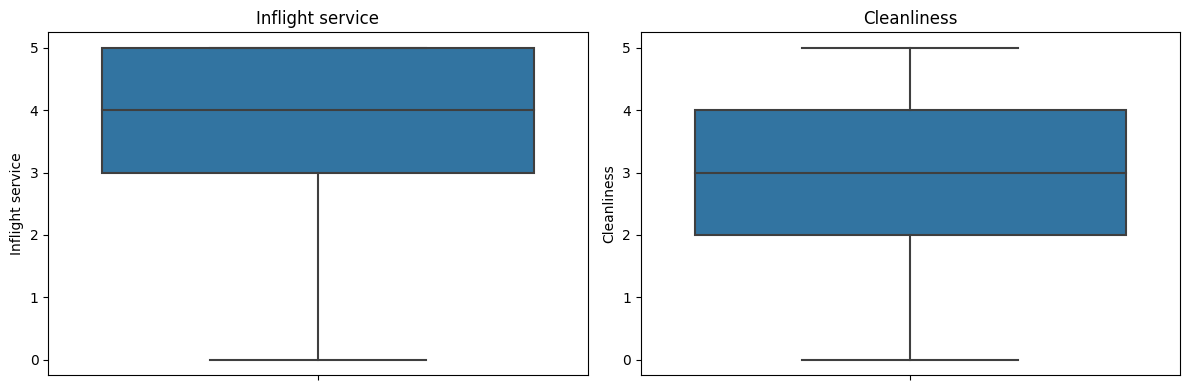

In [14]:
variables_4 = ['Inflight service', 'Cleanliness',]

fig, axes = plt.subplots(nrows = 1, ncols = len(variables_4), figsize = (12, 4))

for i, var in enumerate(variables_4):
    sns.boxplot(data = df, y = var, ax = axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

**INFLIGHT SERVICE**
* Q1 -> 0 TO 2
* Q2 -> 3
* Q3 -> 4
* Q4 -> 5 NO OUTLIERS

**CLEANLINESS**
* Q1 -> 0 TO 1
* Q2 -> 2
* Q3 -> 3
* Q4 -> 4

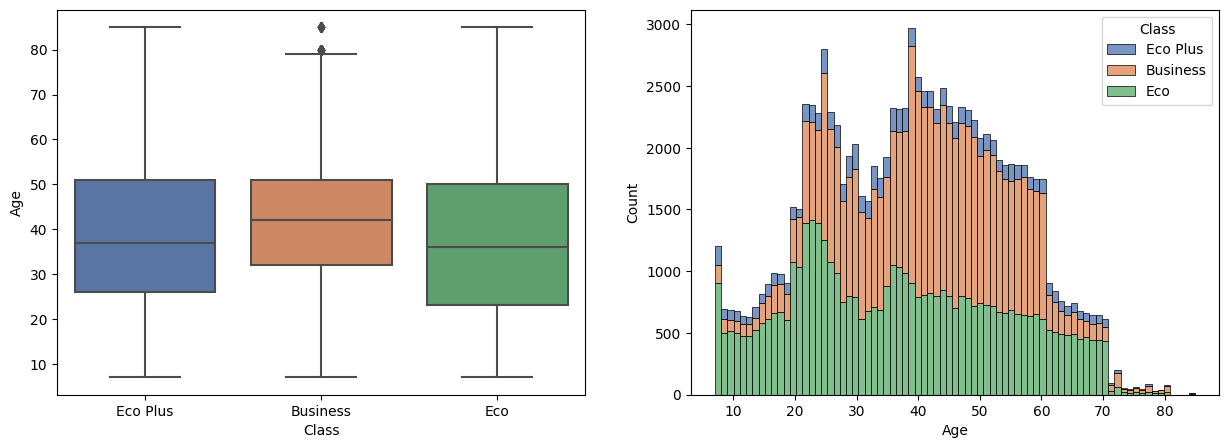

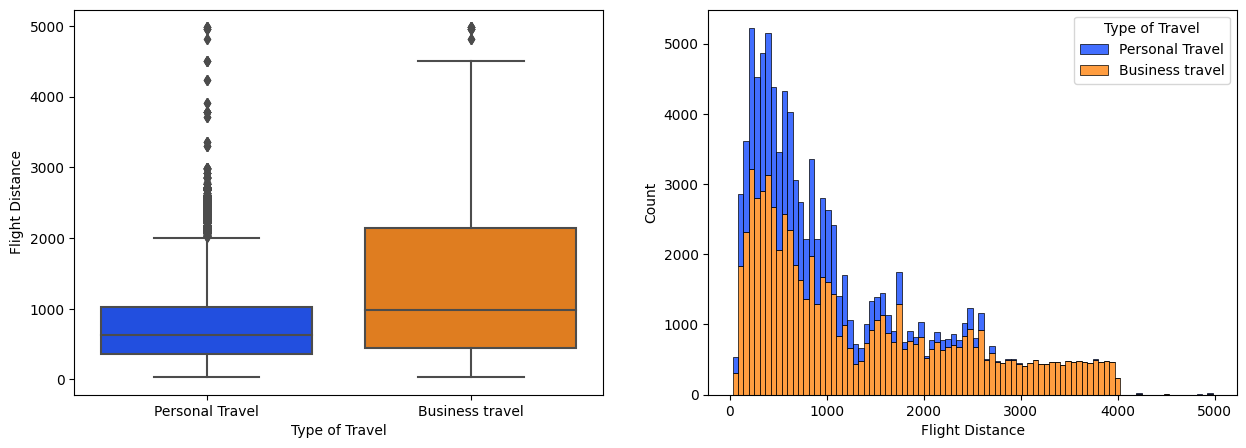

In [15]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = 'Class', y = 'Age', palette = 'deep', data = df, ax = ax[0])
sns.histplot(df, x = 'Age', hue = 'Class', multiple = 'stack', palette = 'deep', linewidth = .5, ax = ax[1])
pass

f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = 'Type of Travel', y = 'Flight Distance', palette = 'bright', data = df, ax = ax[0])
sns.histplot(df, x = 'Flight Distance', hue = 'Type of Travel', multiple = 'stack', palette = 'bright', linewidth = .5, ax = ax[1])
pass

**The age 20 to 50**
* ECO - 1000 to < 1500
age -- 25 to 50
* BUSINESS - 1500 - 2750
age -- >30 to 50
* ECO PLUS - >1500 - 3000
age -- 20 to <50

**FLIGHT DISTANCE VS TYPE OF TRAVEL**
* 400 to 1000 => personal travel
* 500 to 2000 => Business travel

<AxesSubplot: xlabel='Age', ylabel='Count'>

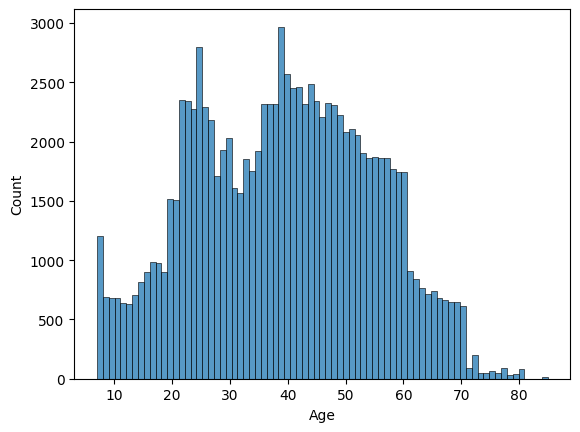

In [16]:
sns.histplot(df['Age'])

AS CONCLUSION **25 to 60 AGED PEOPLE USE AIRLINE REGULARLY**

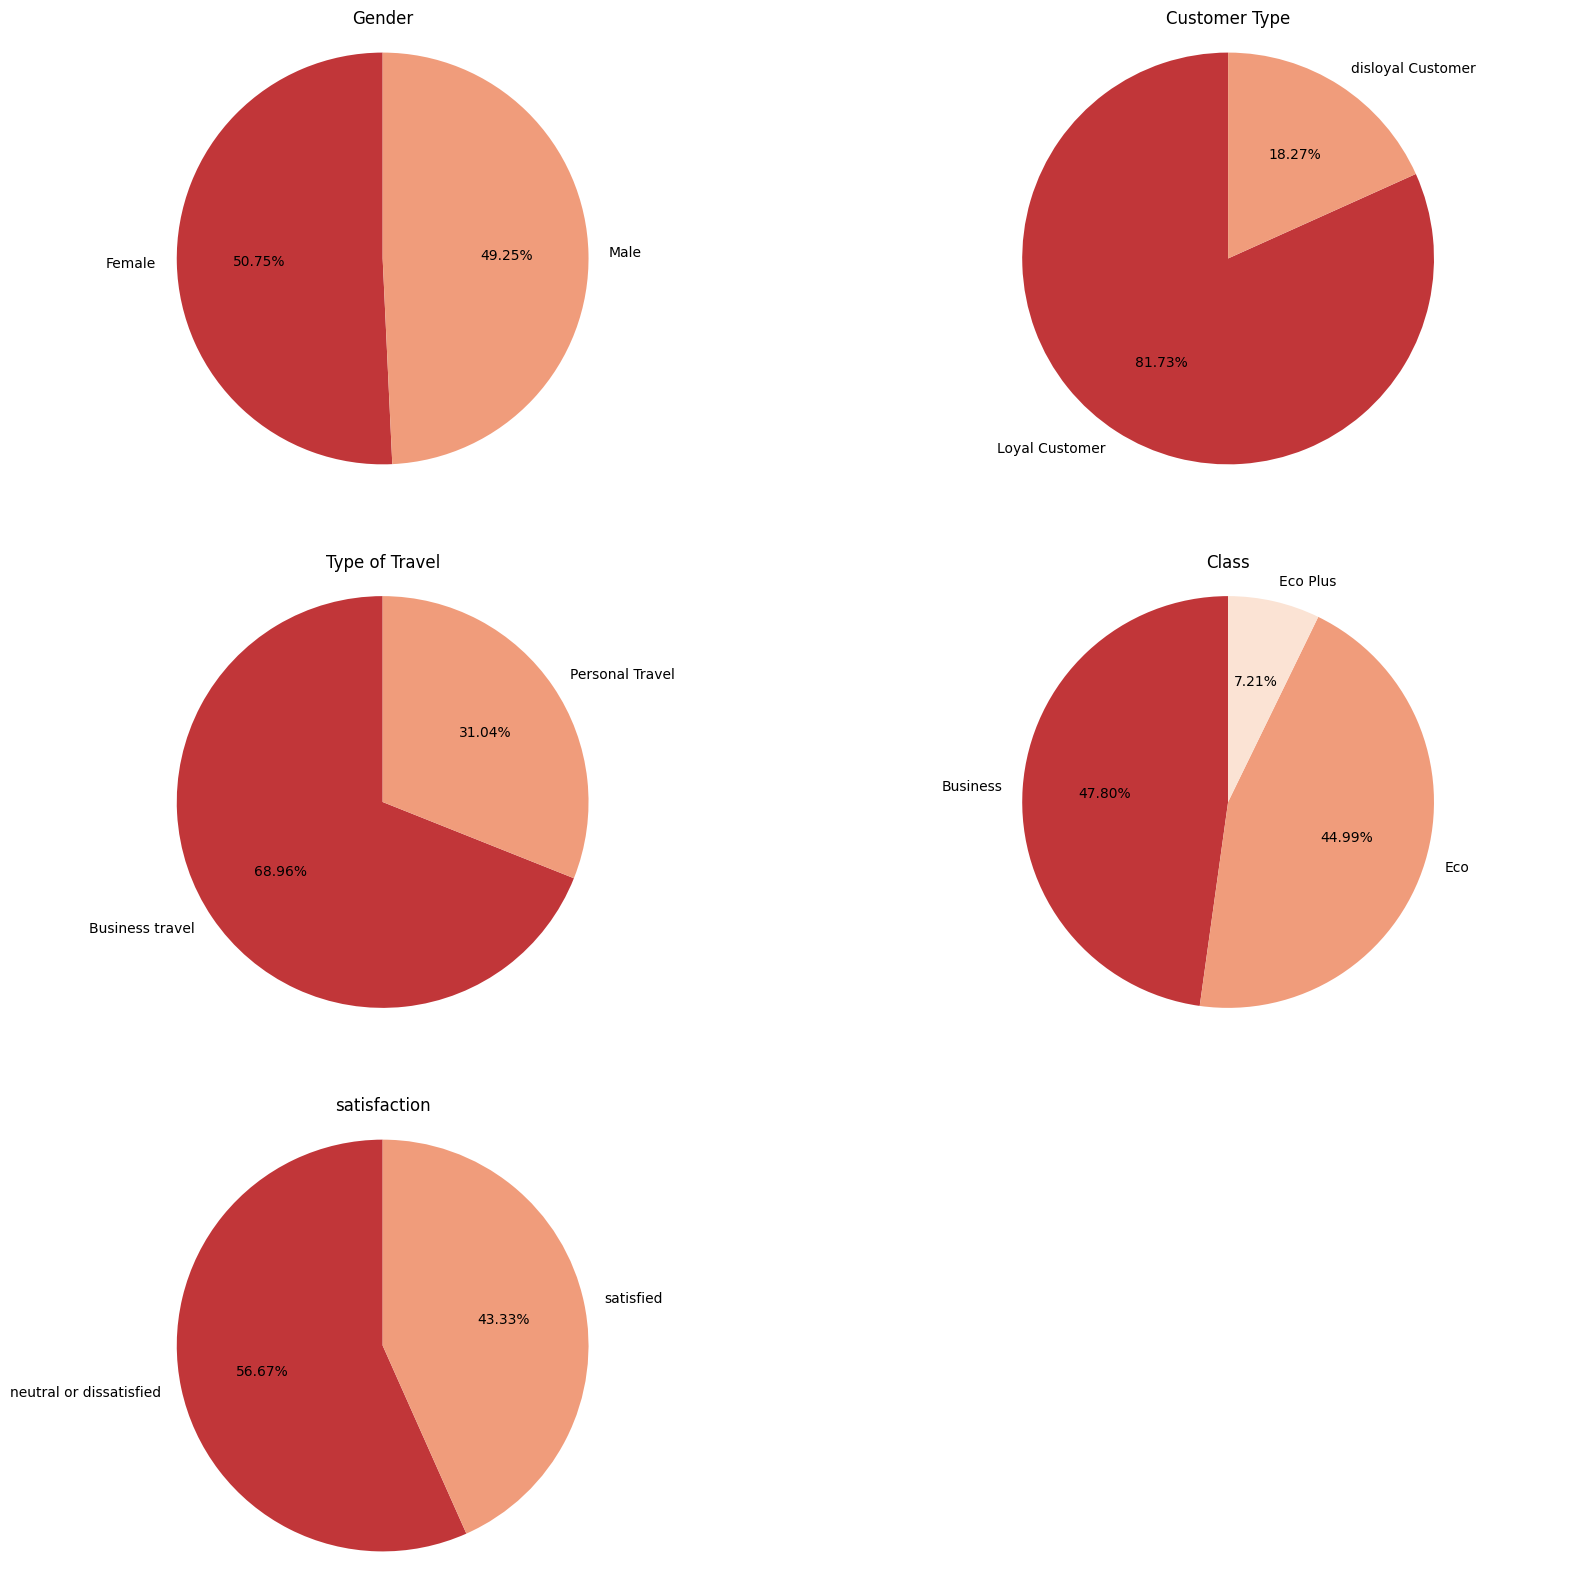

In [17]:
categorical_columns = df.select_dtypes(include = 'object')
fig, axes = plt.subplots(3, 2, figsize = (20, 20))
for i, col in enumerate(categorical_columns):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes, labels = labels, colors = sns.color_palette('RdBu'), autopct = '%1.2f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)

to_flat = axes.flatten()
last = to_flat[-1]
fig.delaxes(last)
plt.show()

* **Gender** FEMALE(50.75) > MALE(49.25)
* **Customer** Type LOYAL CUSTOMER(81.73) > DISLOYAL(18.27)
* **Types of Travel** BUSINESS(68.96) > PERSONAL(31.04)
* **Class** BUSINESS(47.80) > ECO(44.99) > ECO PLUS(7.21)
* **Satisfaction** NEUTRAL/DISSATISFIED(56.67) > SATISFIED(43.33)

<AxesSubplot: xlabel='Cleanliness', ylabel='count'>

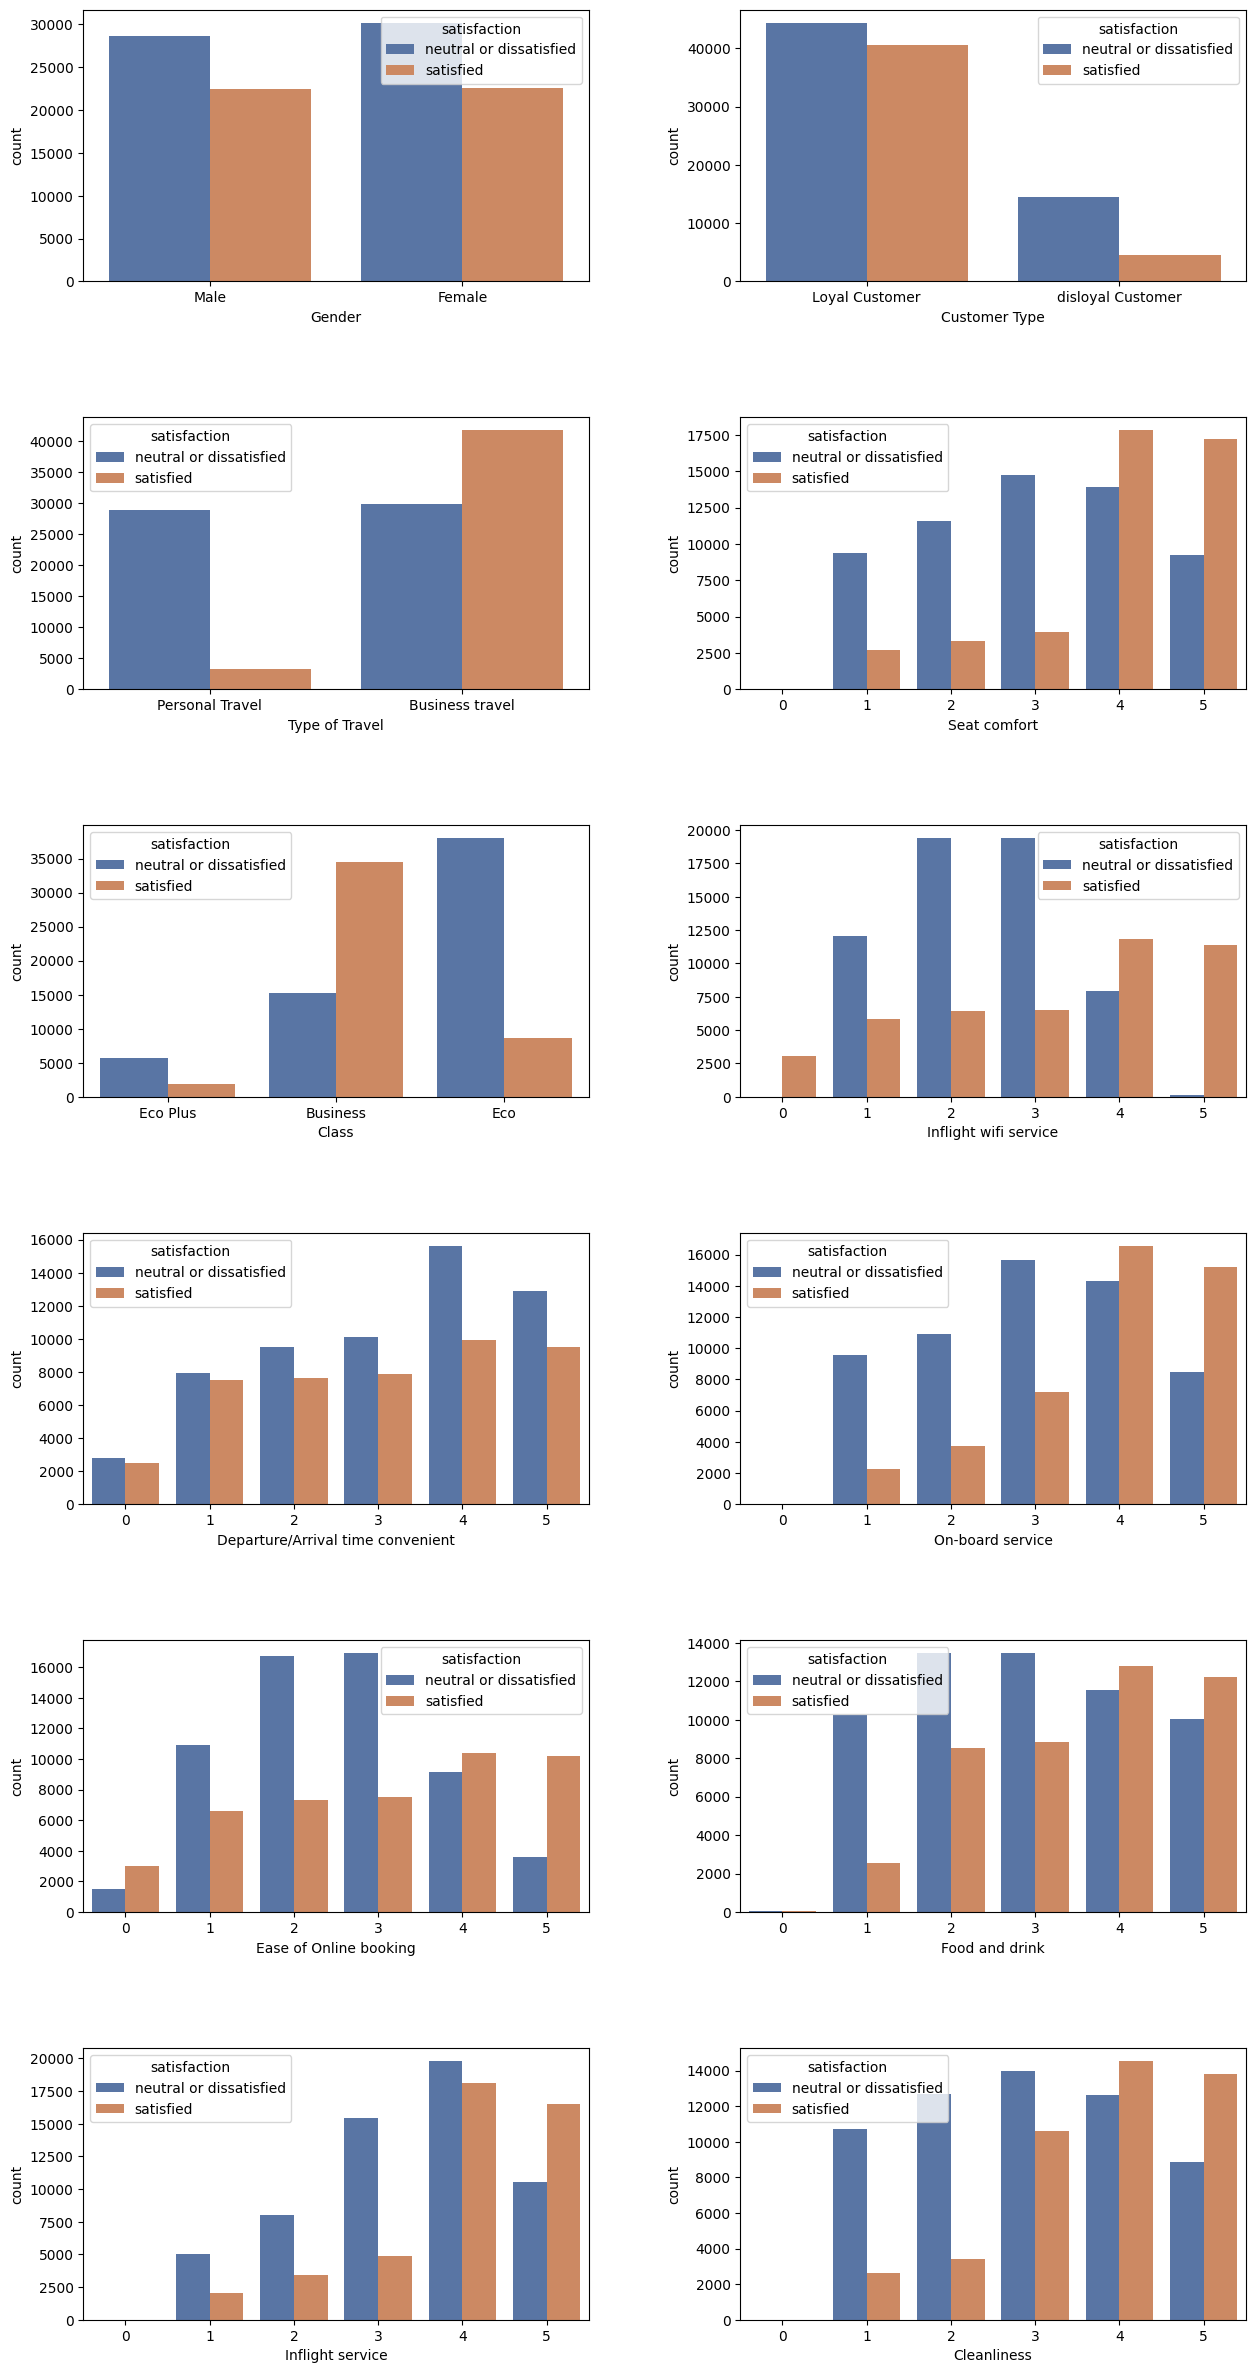

In [18]:
fig, axes = plt.subplots(6, 2, figsize = (15, 30))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
sns.countplot(x = 'Gender', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[0, 0])
sns.countplot(x = 'Customer Type', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[0, 1])
sns.countplot(x = 'Type of Travel', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[1, 0])
sns.countplot(x = 'Seat comfort', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[1, 1])
sns.countplot(x = 'Class', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[2, 0])
sns.countplot(x = 'Inflight wifi service', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[2, 1])
sns.countplot(x = 'Departure/Arrival time convenient', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[3, 0])
sns.countplot(x = 'On-board service', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[3, 1])
sns.countplot(x = 'Ease of Online booking', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[4, 0])
sns.countplot(x = 'Food and drink', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[4, 1])
sns.countplot(x = 'Inflight service', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[5, 0])
sns.countplot(x = 'Cleanliness', data = df, palette= 'deep', hue = 'satisfaction', ax = axes[5, 1])

* **SATISFIED**
* **Customer Type** LOYAL >80000; DISLOYAL < 20000
* **Type of Travel** PERSONAL  5000; BUSINESS 700000
* **Class** ECO PLUS < 5000; BUSINESS - 35000; ECO 40000 > 10000

* **People are SATISFIED with BUSINESS travel AND TRAVELLED TOO FAR**
* **People are SATISFIED with BUSINESS CLASS**

# BIVARIATE ANALYSIS

In [19]:
sample = df.copy()

In [20]:
sample.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [21]:
le = LabelEncoder()
sample['satisfaction'] = le.fit_transform(sample['satisfaction'])

In [22]:
sample.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1


In [23]:
sample.satisfaction.dtype

dtype('int32')

In [24]:
sample.drop('Unnamed: 0', axis = 1, inplace = True)

<AxesSubplot: >

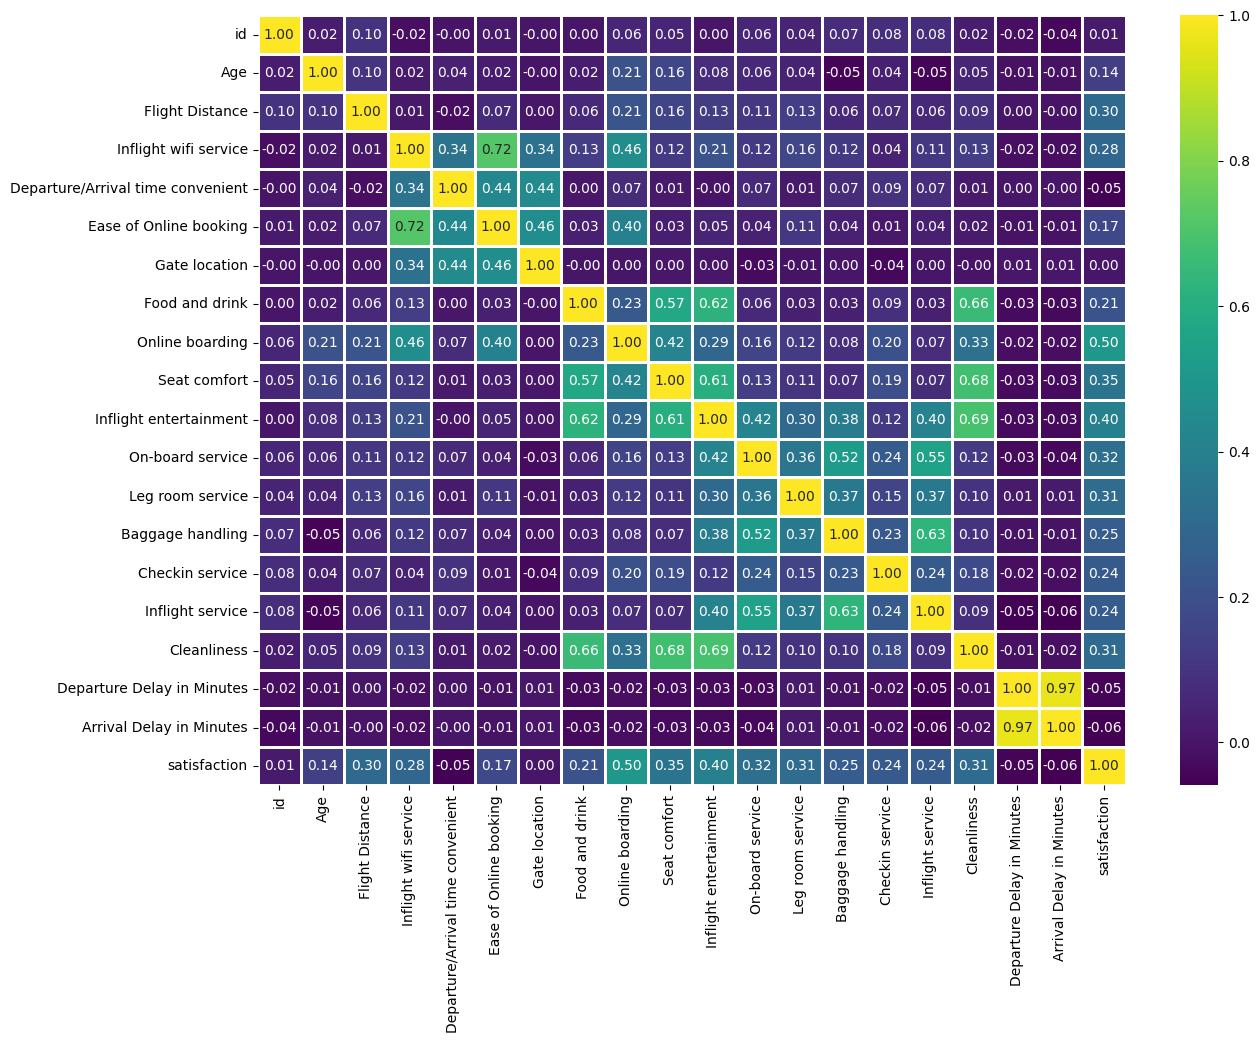

In [25]:
plt.figure(figsize= (14, 10))
sns.heatmap(sample.corr(), annot = True, fmt = '.2f', linewidths = 0.8, cmap = 'viridis')

* **FROM THE ABOVE HEAT MAP**
* AGE - 0.14, DEP/ARR TIME CONVENIENCE - -0.05, GATE LOC - 0.00, DEPT DELAY - -0.05, ARR DELAY - -0.06

* DEPARTURE DELAY & ARRIVAL DELAY ARE ---- **HIGHLY CORRELATED**
* EASE OF ONLINE BOOKING AND INFLIGHT WIFI SERVICE ----- **SLIGHLTY NEXT TO DEPARTURE AND ARRIVAL DELAY CORRELATED**
* FOOD AND DRINK, SEAT COMFORT, CLEANLINESS ---- **NEXT CORRELATED**

In [26]:
sample_col = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
sample_df = df[sample_col].copy()

<AxesSubplot: >

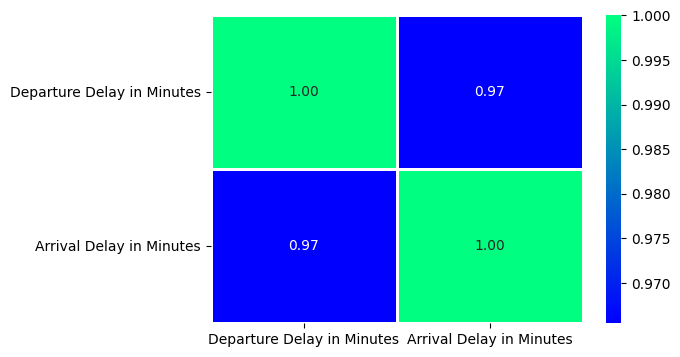

In [27]:
plt.figure(figsize = (6, 4))
sns.heatmap(sample_df.corr(), annot = True, fmt = '.2f', linewidths = 0.8, cmap = 'winter')

Text(0, 0.5, 'Arrival Delay in Minutes')

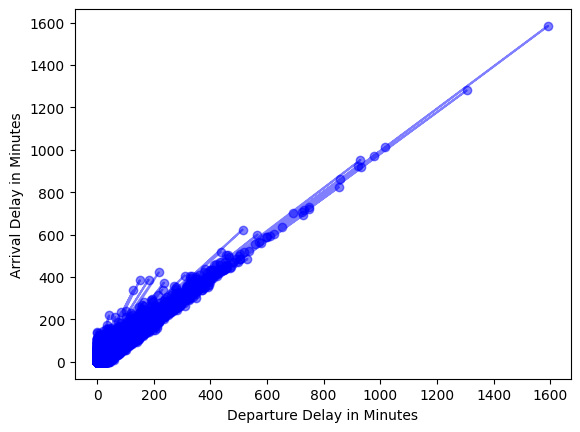

In [28]:
plt.plot('Departure Delay in Minutes', 'Arrival Delay in Minutes', data = df, color = 'blue', marker = 'o', linestyle = '-', alpha = 0.5)
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')

**It forms a linear graph and confirms that highly correlated**

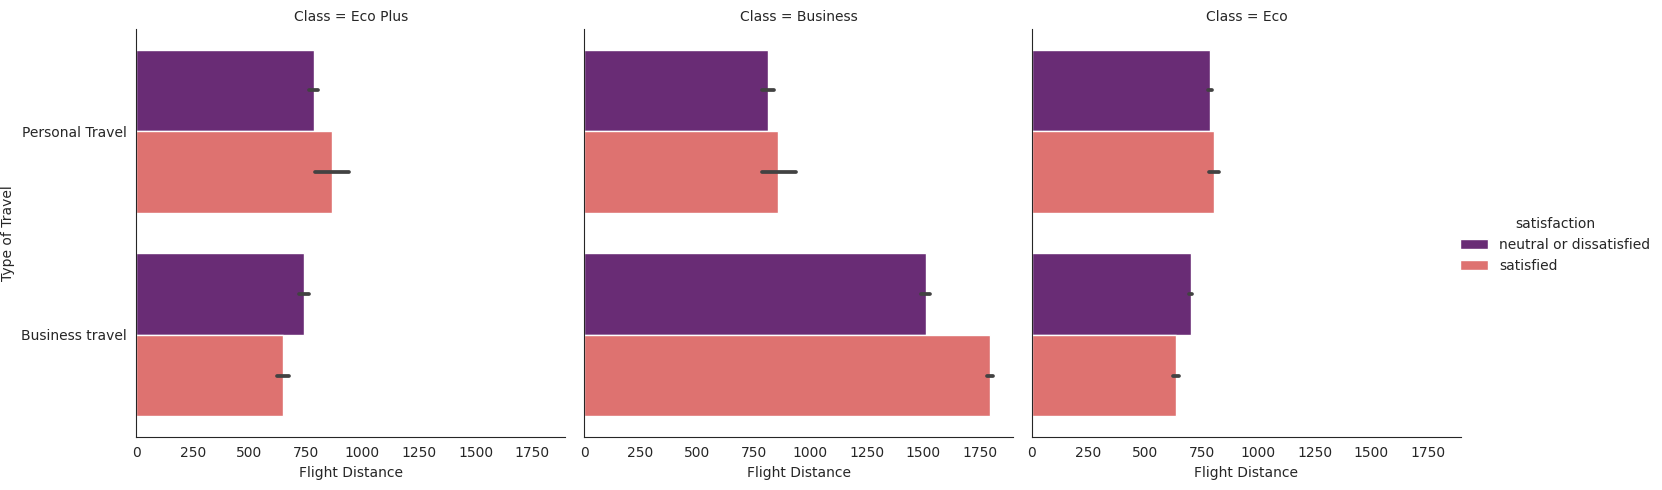

In [29]:
with sns.axes_style('white'):
    flight_Travel = sns.catplot(x = "Flight Distance", y = 'Type of Travel', hue = 'satisfaction', col = 'Class', data = df, kind = 'bar', palette = 'magma')

* IF THE FLIGHT DISTANCE IS TOO LONG(> 1000), PASSENGERS USED TO TRAVEL IN BUSINESS CLASS AND ALSO SATISFIED

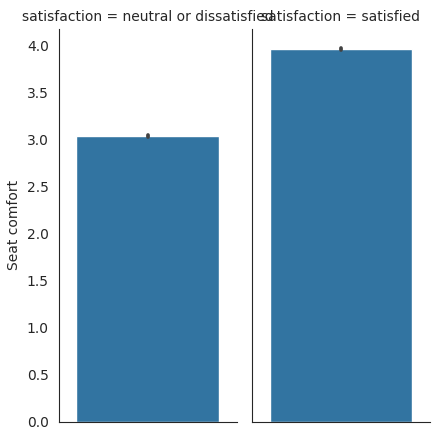

In [30]:
with sns.axes_style('white'):
    seat_comf = sns.catplot(col = 'satisfaction', y = 'Seat comfort', col_wrap = 2, data = df, kind = 'bar', height = 4.5, aspect = .5)

**SEAT COMFORT**
* **LESS OR EQUAL TO 3** RATINGS **DISSATISFIED**
* **MORE THAN 4** RATINGS **SATISFIED**

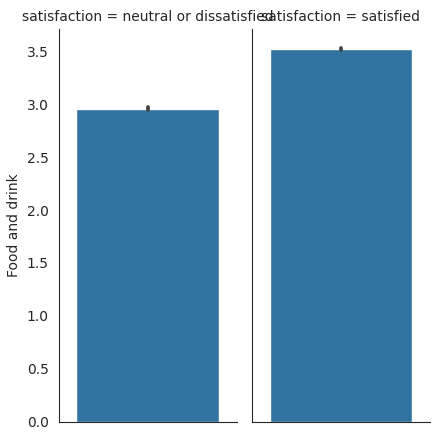

In [31]:
with sns.axes_style('white'):
    food_drink = sns.catplot(col = 'satisfaction', y = 'Food and drink', col_wrap = 2, data = df, kind = 'bar', height = 4.5, aspect = .5)

**FOOD AND DRINK**
* **LESS OR EQUAL TO 3** RATINGS **DISSATISFIED**
* **3.5 AND ABOVE** RATINGS **SATISFIED**

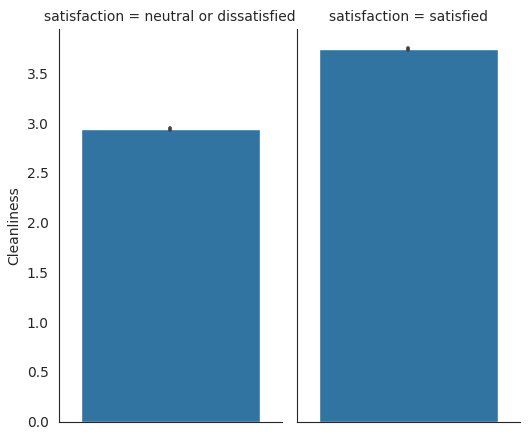

In [32]:
with sns.axes_style('white'):
    clean = sns.catplot(col = 'satisfaction', y = 'Cleanliness', col_wrap = 2, data = df, kind = 'bar', height = 4.5, aspect = .6)

**CLEANLINESS**
* **LESS THAN 3** RATINGS **DISSATISFIED**
* **3 AND ABOVE** RATINGS **SATISFIED**

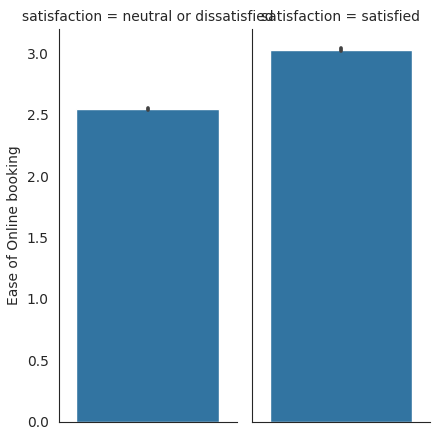

In [33]:
with sns.axes_style('white'):
    online_book = sns.catplot(col = 'satisfaction', y = 'Ease of Online booking', col_wrap = 2, data = df, kind = 'bar', height = 4.5, aspect = .5)

**Ease of Online booking**
* **LESS THAN  OR EQUAL TO 2.5** RATINGS **DISSATISFIED**
* **ABOVE 2.5** RATINGS **SATISFIED**

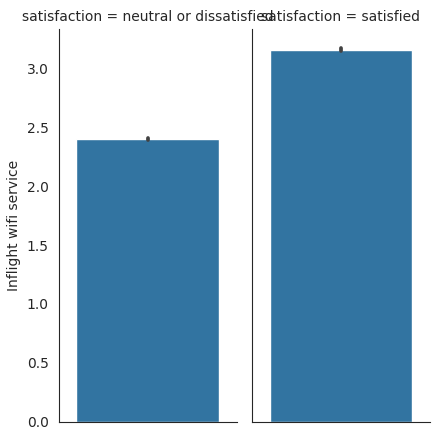

In [34]:
with sns.axes_style('white'):
    wifi_service = sns.catplot(col = 'satisfaction', y = 'Inflight wifi service', col_wrap = 2, data = df, kind = 'bar', height = 4.5, aspect = .5)

**Inflight wifi service**
* **LESS THAN 2.5** RATINGS **DISSATISFIED**
* **2.5 AND ABOVE** RATINGS **SATISFIED**

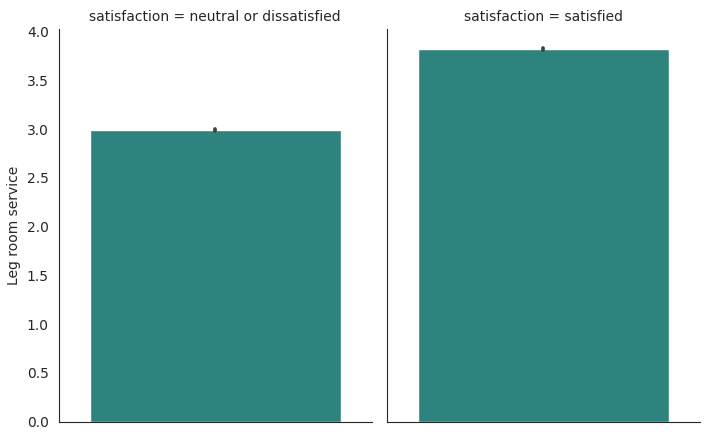

In [35]:
with sns.axes_style('white'):
    leg_room = sns.catplot(y = 'Leg room service', col = 'satisfaction', data = df, kind = 'bar', palette = 'viridis', height = 4.5, aspect = .8)

In [36]:
df.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
45638,45638,122690,Male,disloyal Customer,43,Business travel,Business,361,3,3,...,3,2,3,3,5,3,3,0,0.0,neutral or dissatisfied
83189,83189,101151,Female,Loyal Customer,55,Business travel,Business,3098,1,1,...,2,2,2,2,3,2,4,64,56.0,satisfied
25888,25888,119540,Male,Loyal Customer,21,Personal Travel,Eco,759,3,4,...,3,5,3,4,5,4,3,0,0.0,neutral or dissatisfied
28952,28952,66501,Female,Loyal Customer,47,Business travel,Eco,447,1,4,...,1,1,1,1,2,1,3,0,0.0,neutral or dissatisfied
97580,97580,82032,Female,Loyal Customer,19,Personal Travel,Eco,1535,1,4,...,5,2,5,4,1,4,5,55,42.0,neutral or dissatisfied


In [37]:
df['satisfaction_numeric'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [38]:
df[['satisfaction_numeric', 'Age']].groupby(['Age'], as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)

,Age,satisfaction_numeric
34,41,0.607899
39,46,0.599819
44,51,0.597249
50,57,0.590102
45,52,0.586207
...,...,...
2,9,0.137283
63,70,0.136143
3,10,0.131772
1,8,0.107813


Age - Satisfied --- 41 to 57

In [39]:
df[['Gender', 'satisfaction_numeric']].groupby('Gender', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)

,Gender,satisfaction_numeric
1,Male,0.439475
0,Female,0.427371


* 43.9 % Male are satisfied
* 42.7 % Female are satsified

In [40]:
df[['Customer Type', 'satisfaction_numeric']].groupby('Customer Type', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)

,Customer Type,satisfaction_numeric
0,Loyal Customer,0.477291
1,disloyal Customer,0.236658


* LOYAL CUSTOMER ARE MORE SATISFIED 47.7%

In [41]:
df[['Type of Travel', 'satisfaction_numeric']].groupby('Type of Travel', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)

,Type of Travel,satisfaction_numeric
0,Business travel,0.582597
1,Personal Travel,0.101678


* BUSINESS TRAVELLERS - SATISFIED A LOT 58.2%

In [42]:
df[['Class', 'satisfaction_numeric']].groupby('Class', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)

,Class,satisfaction_numeric
0,Business,0.694251
2,Eco Plus,0.246064
1,Eco,0.186138


* BUSINESS CLASS (69.4%) > ECO PLUS (24.6%) > ECO (18.6%)

In [43]:
df[['Cleanliness', 'satisfaction_numeric']].groupby('Cleanliness', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)

,Cleanliness,satisfaction_numeric
5,5,0.608797
4,4,0.535340
3,3,0.431879
2,2,0.212993
1,1,0.196201
0,0,0.000000


<AxesSubplot: xlabel='Cleanliness', ylabel='satisfaction_numeric'>

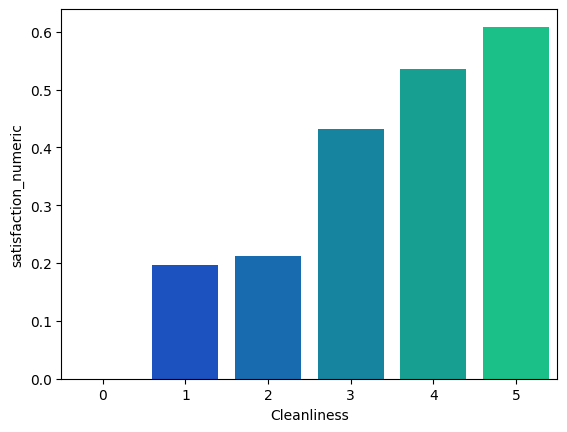

In [44]:
df_clean = df[['Cleanliness', 'satisfaction_numeric']].groupby('Cleanliness', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)
sns.barplot(x = 'Cleanliness', y = 'satisfaction_numeric', data = df_clean, palette = 'winter')

* **CLEANLINESS**
* 5 (60.8%) > 4 (53.5%) > 3 (43.1%) > 2 (21.2%) > 1 (19.6%) > 0 (0%)


* **NO ZERO RATINGS**

In [45]:
df[['Inflight wifi service', 'satisfaction_numeric']].groupby(['Inflight wifi service'],as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)

,Inflight wifi service,satisfaction_numeric
0,0,0.997422
5,5,0.990758
4,4,0.598969
1,1,0.325448
3,3,0.250580
2,2,0.248664


<AxesSubplot: xlabel='Inflight wifi service', ylabel='satisfaction_numeric'>

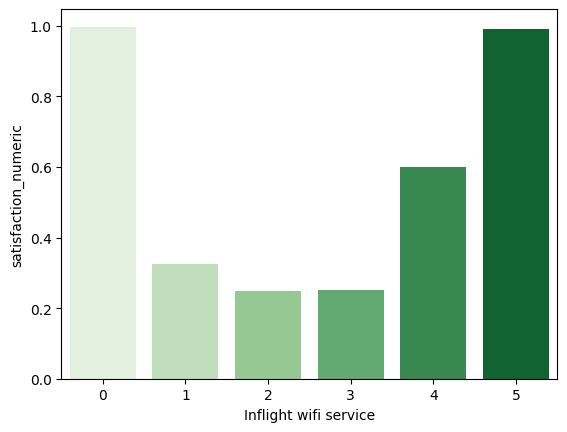

In [46]:
df_wifi = df[['Inflight wifi service', 'satisfaction_numeric']].groupby(['Inflight wifi service'],as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)
sns.barplot(x = 'Inflight wifi service', y = 'satisfaction_numeric', data = df_wifi, palette = 'Greens')

* INFLIGHT WIFI SERVICE
* 0 99.7%   **(NOT SATISFIED PASSENGERS ARE HIGHER IN INFLIGHT WIFI SERVICE)**
* 5 99.0% > 4(59.8%) > 1(32.5%) >3(25.0%) > 2(24.8%)

In [47]:
df[['Food and drink', 'satisfaction_numeric']].groupby('Food and drink', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)

,Food and drink,satisfaction_numeric
5,5,0.549007
4,4,0.524981
0,0,0.467290
3,3,0.396368
2,2,0.387939
1,1,0.200047


<AxesSubplot: xlabel='Food and drink', ylabel='satisfaction_numeric'>

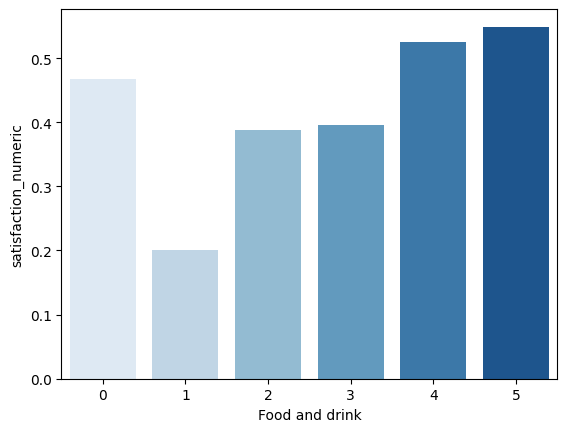

In [48]:
df_food = df[['Food and drink', 'satisfaction_numeric']].groupby('Food and drink', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)
sns.barplot(x = 'Food and drink', y = 'satisfaction_numeric', data = df_food, palette = 'Blues')

* FOOD AND DRINK
* 5(54.9%) > 4(52.4%) > 0(46.7%) > 3(39.6%) > 2(38.7%) > 1(20.0%)

In [49]:
df[['Seat comfort', 'satisfaction_numeric']].groupby('Seat comfort', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)

,Seat comfort,satisfaction_numeric
5,5,0.650208
4,4,0.561152
2,2,0.224139
1,1,0.223188
3,3,0.211543
0,0,0.000000


5 > 4 > 2 > 1 > 3 > 0
* **SEAT COMFORT HAS NO ZERO RATINGS**

<AxesSubplot: xlabel='Seat comfort', ylabel='satisfaction_numeric'>

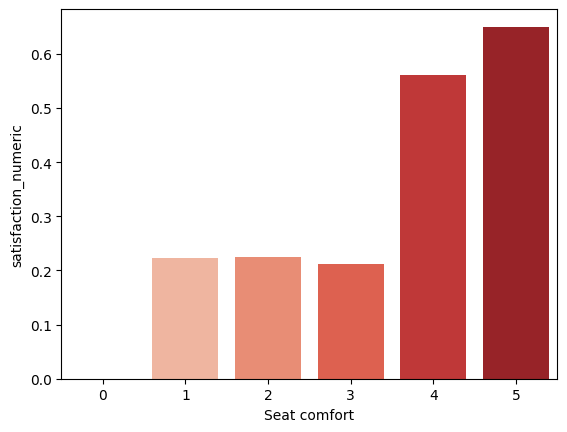

In [50]:
df_seat = df[['Seat comfort', 'satisfaction_numeric']].groupby('Seat comfort', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)
sns.barplot(x = 'Seat comfort', y = 'satisfaction_numeric', data = df_seat, palette = 'Reds')

<AxesSubplot: xlabel='Seat comfort', ylabel='satisfaction_numeric'>

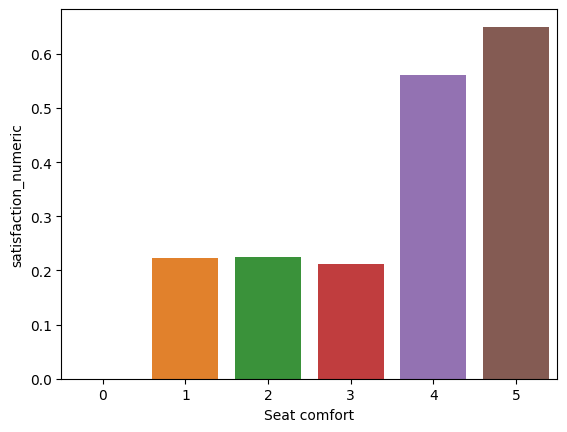

In [51]:
sns.barplot(x = 'Seat comfort', y = 'satisfaction_numeric', data = df_seat)

<AxesSubplot: xlabel='Inflight entertainment', ylabel='satisfaction_numeric'>

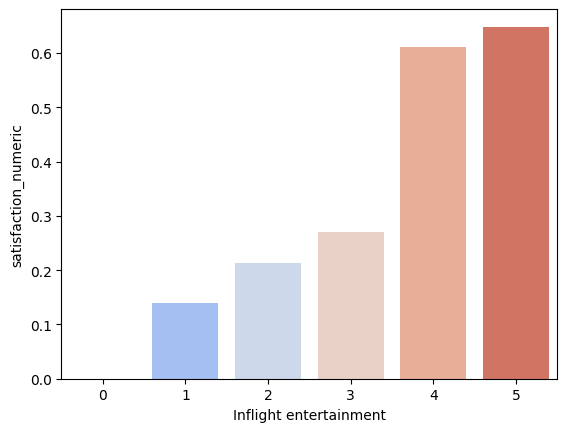

In [52]:
df_entertainment = df[['Inflight entertainment', 'satisfaction_numeric']].groupby('Inflight entertainment', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)
sns.barplot(x = 'Inflight entertainment', y = 'satisfaction_numeric', data = df_entertainment, palette = 'coolwarm')

<AxesSubplot: xlabel='On-board service', ylabel='satisfaction_numeric'>

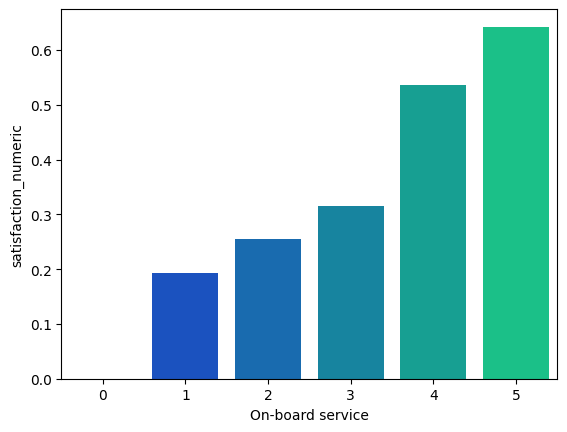

In [53]:
df_onboard = df[['On-board service', 'satisfaction_numeric']].groupby('On-board service', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)
sns.barplot(x = 'On-board service', y = 'satisfaction_numeric', data = df_onboard, palette = 'winter')

<AxesSubplot: xlabel='Leg room service', ylabel='satisfaction_numeric'>

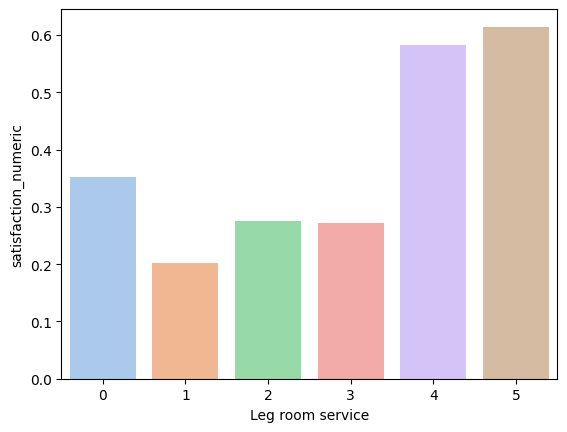

In [54]:
df_legroom = df[['Leg room service', 'satisfaction_numeric']].groupby('Leg room service', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)
sns.barplot(x = 'Leg room service', y = 'satisfaction_numeric', data = df_legroom, palette = 'pastel')

<AxesSubplot: xlabel='Baggage handling', ylabel='satisfaction_numeric'>

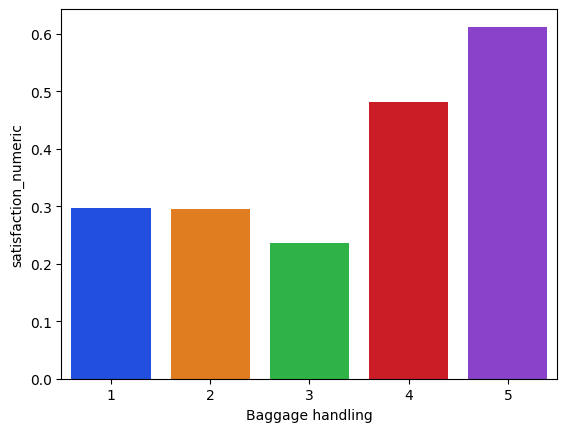

In [55]:
df_bag = df[['Baggage handling', 'satisfaction_numeric']].groupby('Baggage handling', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)
sns.barplot(x = 'Baggage handling', y = 'satisfaction_numeric', data = df_bag, palette = 'bright')

<AxesSubplot: xlabel='Inflight service', ylabel='satisfaction_numeric'>

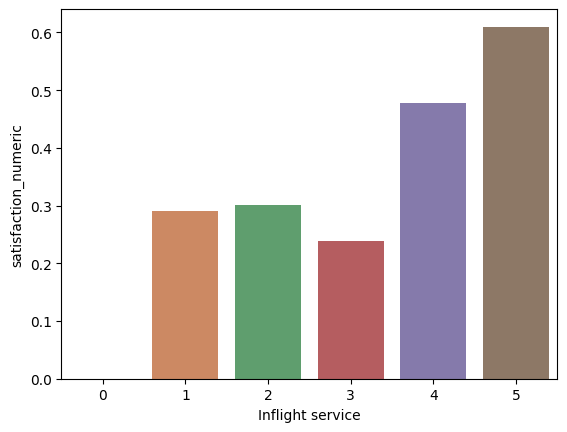

In [56]:
df_inflight = df[['Inflight service', 'satisfaction_numeric']].groupby('Inflight service', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)
sns.barplot(x = 'Inflight service', y = 'satisfaction_numeric', data = df_inflight, palette = 'deep')

<AxesSubplot: xlabel='Gate location', ylabel='satisfaction_numeric'>

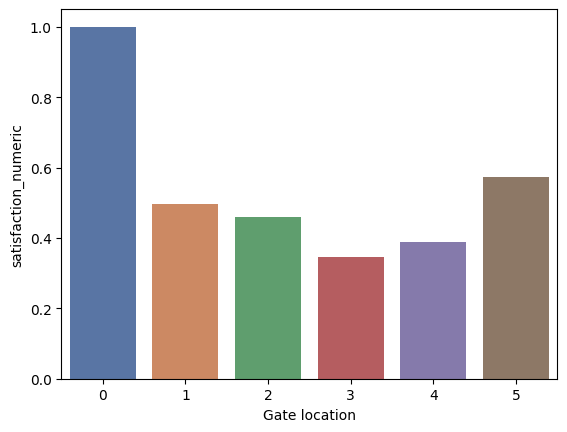

In [57]:
df_gate = df[['Gate location', 'satisfaction_numeric']].groupby('Gate location', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)
sns.barplot(x = 'Gate location', y = 'satisfaction_numeric', data = df_gate, palette = 'deep')

<AxesSubplot: xlabel='Checkin service', ylabel='satisfaction_numeric'>

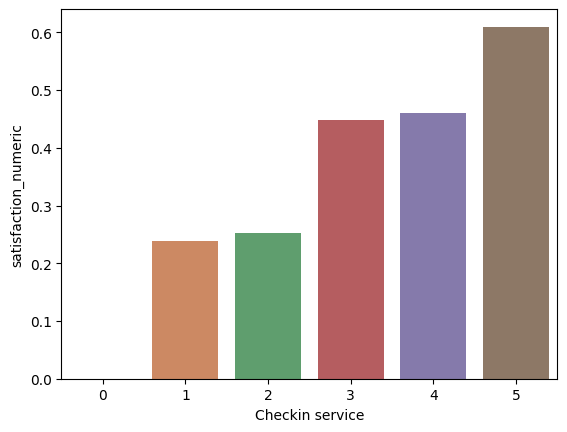

In [58]:
df_check = df[['Checkin service', 'satisfaction_numeric']].groupby('Checkin service', as_index = False).mean().sort_values(by = 'satisfaction_numeric', ascending = False)
sns.barplot(x = 'Checkin service', y = 'satisfaction_numeric', data = df_check, palette = 'deep')

# FEATURE ENGINEERING

In [59]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

* 310 null values in Arrival Delay in Minutes

In [60]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0])

In [61]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
satisfaction_numeric     

In [62]:
df.drop('id', axis = 1, inplace = True)

In [63]:
df.drop('Customer Type', axis = 1, inplace = True)

In [64]:
df['satisfaction'] = df['satisfaction_numeric']
df.drop('satisfaction_numeric', axis = 1, inplace = True)

* Since **Departure Delay and Arrival Delay are 97% correlated** , excluding or dropping 1 column

In [65]:
df.sample(5)

,Unnamed: 0,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
27266,27266,Female,54,Business travel,Business,414,4,4,5,4,...,5,5,5,5,5,5,4,0,0.0,1
16843,16843,Male,25,Business travel,Business,216,3,0,3,3,...,5,4,3,5,4,4,5,0,0.0,0
54330,54330,Female,51,Personal Travel,Eco,685,3,3,3,3,...,5,5,3,5,1,5,1,0,0.0,0
22174,22174,Male,42,Business travel,Business,3809,4,4,4,4,...,4,2,5,4,4,4,4,133,193.0,1
29349,29349,Male,44,Business travel,Business,2311,2,2,2,2,...,5,5,5,5,4,5,5,14,0.0,1


In [66]:
df.shape

(103904, 23)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [69]:
df['Class'] = le.fit_transform(df['Class'])

In [70]:
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])

In [71]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype('int64')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Unnamed: 0                         103904 non-null  int64
 1   Gender                             103904 non-null  int32
 2   Age                                103904 non-null  int64
 3   Type of Travel                     103904 non-null  int32
 4   Class                              103904 non-null  int32
 5   Flight Distance                    103904 non-null  int64
 6   Inflight wifi service              103904 non-null  int64
 7   Departure/Arrival time convenient  103904 non-null  int64
 8   Ease of Online booking             103904 non-null  int64
 9   Gate location                      103904 non-null  int64
 10  Food and drink                     103904 non-null  int64
 11  Online boarding                    103904 non-null  int64
 12  Se

In [73]:
df.Gender = df.Gender.astype('int64')

In [74]:
df.Class = df.Class.astype('int64')
df['Type of Travel'] = df['Type of Travel'].astype('int64')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Unnamed: 0                         103904 non-null  int64
 1   Gender                             103904 non-null  int64
 2   Age                                103904 non-null  int64
 3   Type of Travel                     103904 non-null  int64
 4   Class                              103904 non-null  int64
 5   Flight Distance                    103904 non-null  int64
 6   Inflight wifi service              103904 non-null  int64
 7   Departure/Arrival time convenient  103904 non-null  int64
 8   Ease of Online booking             103904 non-null  int64
 9   Gate location                      103904 non-null  int64
 10  Food and drink                     103904 non-null  int64
 11  Online boarding                    103904 non-null  int64
 12  Se

In [76]:
df_test = pd.read_csv('test.csv')

In [77]:
df_test.sample(7)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
9866,9866,60354,Female,Loyal Customer,61,Personal Travel,Eco Plus,1024,3,4,...,5,5,4,5,3,5,5,0,0.0,neutral or dissatisfied
17623,17623,106962,Male,Loyal Customer,51,Business travel,Business,2444,2,2,...,5,5,5,5,4,5,5,0,0.0,satisfied
3343,3343,2707,Female,Loyal Customer,14,Personal Travel,Eco,562,1,5,...,1,3,2,4,4,4,1,50,48.0,neutral or dissatisfied
6567,6567,114745,Female,Loyal Customer,46,Business travel,Business,1573,5,5,...,5,5,5,5,3,5,3,73,64.0,satisfied
24007,24007,7562,Male,Loyal Customer,59,Business travel,Business,3451,1,1,...,4,4,4,4,4,4,3,0,0.0,satisfied
23821,23821,101683,Female,Loyal Customer,39,Business travel,Business,1500,4,4,...,5,5,5,5,5,5,3,1,0.0,satisfied
15821,15821,126920,Male,Loyal Customer,41,Personal Travel,Business,651,3,2,...,2,2,3,2,2,2,1,0,1.0,neutral or dissatisfied


In [78]:
df_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [79]:
df_test.drop('Unnamed: 0', axis = 1, inplace = True)

In [80]:
df_test.drop('id', axis = 1, inplace = True)

In [81]:
df_test.drop('Customer Type', axis = 1, inplace = True)

In [82]:
df_test['Gender'] = le.fit_transform(df_test['Gender'])

In [83]:
df_test['Class'] = le.fit_transform(df_test['Class'])

In [84]:
df_test['Type of Travel'] = le.fit_transform(df_test['Type of Travel'])

In [85]:
df_test['satisfaction'] = le.fit_transform(df_test['satisfaction'])

In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int32  
 1   Age                                25976 non-null  int64  
 2   Type of Travel                     25976 non-null  int32  
 3   Class                              25976 non-null  int32  
 4   Flight Distance                    25976 non-null  int64  
 5   Inflight wifi service              25976 non-null  int64  
 6   Departure/Arrival time convenient  25976 non-null  int64  
 7   Ease of Online booking             25976 non-null  int64  
 8   Gate location                      25976 non-null  int64  
 9   Food and drink                     25976 non-null  int64  
 10  Online boarding                    25976 non-null  int64  
 11  Seat comfort                       25976 non-null  int

In [87]:
df_test.isnull().sum()

Gender                                0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [88]:
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mode()[0])

In [89]:
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].astype('int64')

In [90]:
final_df = pd.concat([df, df_test])

In [91]:
final_df.head()

,Unnamed: 0,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,1,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18,0
1,1.0,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6,0
2,2.0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,3.0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9,0
4,4.0,1,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0,1


In [92]:
final_df.shape

(129880, 23)

In [93]:
final_df.drop('Age', axis = 1, inplace = True)

In [94]:
final_df.drop('Departure/Arrival time convenient', axis = 1, inplace = True)

In [95]:
final_df.drop('Gate location', axis = 1, inplace = True)

In [96]:
final_df.drop('Departure Delay in Minutes', axis = 1, inplace = True)

In [97]:
final_df.drop('Arrival Delay in Minutes', axis = 1, inplace = True)

In [98]:
final_df.isnull().sum()

Unnamed: 0                25976
Gender                        0
Type of Travel                0
Class                         0
Flight Distance               0
Inflight wifi service         0
Ease of Online booking        0
Food and drink                0
Online boarding               0
Seat comfort                  0
Inflight entertainment        0
On-board service              0
Leg room service              0
Baggage handling              0
Checkin service               0
Inflight service              0
Cleanliness                   0
satisfaction                  0
dtype: int64

In [99]:
final_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [100]:
x = final_df.drop('satisfaction', axis = 1)
y = final_df['satisfaction']

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [102]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

103904
103904
25976
25976


In [103]:
final_df.shape

(129880, 17)

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [105]:
model_LR = LogisticRegression()

In [106]:
model_LR.fit(x_train, y_train)

LogisticRegression()

In [107]:
y_pred_LR = model_LR.predict(x_test)

In [108]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)

In [109]:
print((accuracy_LR) * 100)

85.66368955959346


In [110]:
model_KNN = KNeighborsClassifier(n_neighbors = 5)

In [111]:
model_KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [112]:
y_pred_KNN = model_KNN.predict(x_test)

In [113]:
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print((accuracy_KNN) * 100)

92.19279334770557


In [114]:
model_NB = GaussianNB()

In [115]:
model_NB.fit(x_train, y_train)

GaussianNB()

In [116]:
y_pred_NB = model_NB.predict(x_test)

In [117]:
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print((accuracy_NB) * 100)

85.43655682168155


# MODELS AND ITS ACCURACY
* **LOGISTIC REGRESSION** - **85.66%**
* **K-NEAREST NEIGHBORS** - **92.19%**
* **NAIVE BAYES** - **85.43%**

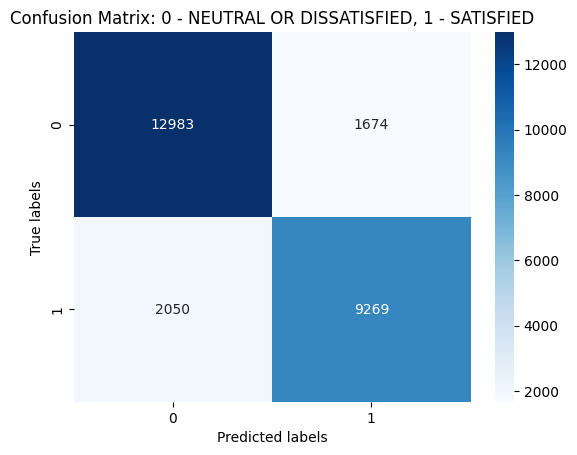

In [118]:
cm_LR = confusion_matrix(y_test, y_pred_LR)

sns.heatmap(cm_LR, annot = True, fmt = 'd', cmap = 'Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: 0 - NEUTRAL OR DISSATISFIED, 1 - SATISFIED')
plt.show()

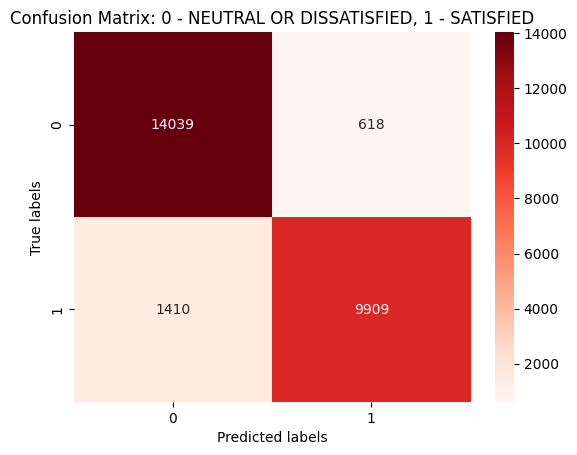

In [119]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

sns.heatmap(cm_KNN, annot = True, fmt = 'd', cmap = 'Reds')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: 0 - NEUTRAL OR DISSATISFIED, 1 - SATISFIED')
plt.show()

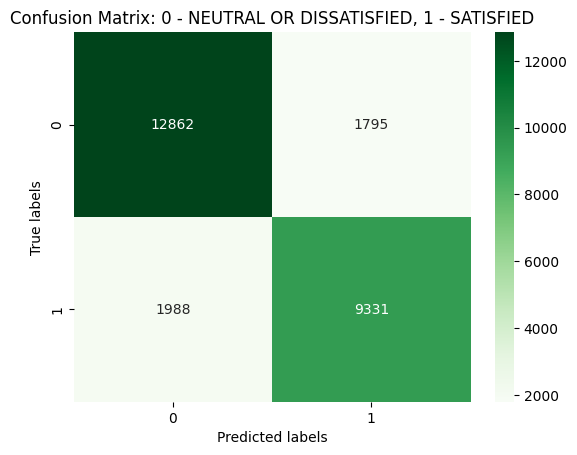

In [120]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

sns.heatmap(cm_NB, annot = True, fmt = 'd', cmap = 'Greens')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: 0 - NEUTRAL OR DISSATISFIED, 1 - SATISFIED')
plt.show()

# CONFUSION MATRIX AND COMPARISION

* **LOGISTIC REGRESSION**  

* TRUE POSITIVE ACTUAL DISSATISFIED - 12983
* TRUE NEGATIVE SATISFIED - 9269
* FALSE POSTIVE ACTUALLY SATISFIED BUT PREDICTED AS DISSATISFIED - 1674
* FALSE NEGATIVE ACTUALLY DISSATISFIED BUT PREDICTED AS SATISFIED - 2050


* **K-NEAREST NEIGHBORS**            
* TRUE POSITIVE ACTUAL DISSATISFIED - 14039
* TRUE NEGATIVE SATISFIED - 9909
* FALSE POSTIVE ACTUALLY SATISFIED BUT PREDICTED AS DISSATISFIED - 618
* FALSE NEGATIVE ACTUALLY DISSATISFIED BUT PREDICTED AS SATISFIED - 1410

* **GAUSSIAN NAIVE BAYES**            
* TRUE POSITIVE ACTUAL DISSATISFIED - 12862
* TRUE NEGATIVE SATISFIED - 9331
* FALSE POSTIVE ACTUALLY SATISFIED BUT PREDICTED AS DISSATISFIED - 1795
* FALSE NEGATIVE ACTUALLY DISSATISFIED BUT PREDICTED AS SATISFIED - 1988

* **K-NEAREST NEIGHBORS > LOGISTIC REGRESSION > GAUSSIAN NAIVE BAYES**

# HYPERPARAMETER TUNING

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}

In [123]:
log = LogisticRegression(solver = 'liblinear')

In [124]:
grid_search_LR = GridSearchCV(log, param_grid, cv = 5, scoring = 'accuracy')
grid_search_LR.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [125]:
best_model = grid_search_LR.best_estimator_

In [126]:
results = grid_search_LR.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Parameters: ", params)
    print("Mean Score: ", mean_score)
    print()

Parameters:  {'C': 0.1, 'penalty': 'l1'}
Mean Score:  0.8574453185400766

Parameters:  {'C': 0.1, 'penalty': 'l2'}
Mean Score:  0.8573971967341347

Parameters:  {'C': 1, 'penalty': 'l1'}
Mean Score:  0.8574260697250704

Parameters:  {'C': 1, 'penalty': 'l2'}
Mean Score:  0.8574356939010004

Parameters:  {'C': 10, 'penalty': 'l1'}
Mean Score:  0.8573971971972807

Parameters:  {'C': 10, 'penalty': 'l2'}
Mean Score:  0.8574260697250704

Parameters:  {'C': 100, 'penalty': 'l1'}
Mean Score:  0.8574164455491404

Parameters:  {'C': 100, 'penalty': 'l2'}
Mean Score:  0.8574260697250704



In [127]:
print("Best Hyperparameters: ", grid_search_LR.best_params_)
print("Best Score: ", grid_search_LR.best_score_)

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l1'}
Best Score:  0.8574453185400766


In [128]:
grid_search_LR  = grid_search_LR.predict(x_test)

In [129]:
print('accuracy: ', accuracy_score(y_test, grid_search_LR))

accuracy:  0.8566368955959347


In [130]:
knn = KNeighborsClassifier()

In [131]:
k_range = list(range(1, 8))

In [132]:
param_grid_KNN = dict(n_neighbors = k_range)

In [133]:
grid_search_KNN = GridSearchCV(knn, param_grid_KNN, cv = 5, scoring = 'accuracy')
grid_search_KNN.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

In [134]:
best_model = grid_search_KNN.best_estimator_

In [135]:
print(grid_search_KNN.best_params_)

{'n_neighbors': 7}


In [136]:
accuracy = grid_search_KNN.best_score_ *100
print("Accuracy: {:.2f}%".format(accuracy) )

Accuracy: 92.48%


In [137]:
grid_search_KNN  = grid_search_KNN.predict(x_test)

In [138]:
print('accuracy: ', accuracy_score(y_test, grid_search_KNN))

accuracy:  0.9228518632583924


# CONCLUSION
* **THE BEST MODEL IS K-NEAREST NEIGHBORS CLASSIFIER WITH ACCURACY 92.28% AFTER HYPERPARAMETER TUNING**